In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


# Data Cleaning

In [6]:
null_value_columns = train.isnull().sum().sort_values(ascending = False).head(20)
null_value_columns = null_value_columns.reset_index()
null_value_columns

,index,0
0,PoolQC,1453
1,MiscFeature,1406
2,Alley,1369
3,Fence,1179
4,FireplaceQu,690
5,LotFrontage,259
6,GarageCond,81
7,GarageType,81
8,GarageYrBlt,81
9,GarageFinish,81


Let's iterate through the columns of this particular dataset to obtain the datatypes of the columns

In [7]:
data_types = {}
for col in list(null_value_columns['index']):
    data_types[col] = type(train[col].iloc[0])
data_types

{'PoolQC': float,
 'MiscFeature': float,
 'Alley': float,
 'Fence': float,
 'FireplaceQu': float,
 'LotFrontage': numpy.float64,
 'GarageCond': str,
 'GarageType': str,
 'GarageYrBlt': numpy.float64,
 'GarageFinish': str,
 'GarageQual': str,
 'BsmtExposure': str,
 'BsmtFinType2': str,
 'BsmtFinType1': str,
 'BsmtCond': str,
 'BsmtQual': str,
 'MasVnrArea': numpy.float64,
 'MasVnrType': str,
 'Electrical': str,
 'Utilities': str}

Let's remove the first two columns.

In [8]:
train = train.drop(columns = ['PoolQC', 'MiscFeature'])
test = test.drop(columns = ['PoolQC', 'MiscFeature'])

For the below features, it may be appropriate to impute based on the mode.

In [9]:
train['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Impute values in Alley with the mode.

In [10]:
train.loc[(train['Alley'] != 'Grvl') & (train['Alley'] != 'Pave'), 'Alley'] = 'Grvl'
test.loc[(test['Alley'] != 'Grvl') & (test['Alley'] != 'Pave'), 'Alley'] = 'Grvl'
train['Alley']

0       Grvl
1       Grvl
2       Grvl
3       Grvl
4       Grvl
        ... 
1455    Grvl
1456    Grvl
1457    Grvl
1458    Grvl
1459    Grvl
Name: Alley, Length: 1460, dtype: object

In [11]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Impute values in Fence with the mode.

In [12]:
train.loc[(train['Fence'] != 'MnPrv') & (train['Fence'] != 'GdPrv') & (train['Fence'] != 'GdWo') & (train['Fence'] != 'MnWw'), 'Fence'] = 'MnPrv'
train['Fence'].head(10)

0    MnPrv
1    MnPrv
2    MnPrv
3    MnPrv
4    MnPrv
5    MnPrv
6    MnPrv
7    MnPrv
8    MnPrv
9    MnPrv
Name: Fence, dtype: object

In [13]:
test.loc[(test['Fence'] != 'MnPrv') & (test['Fence'] != 'GdPrv') & (test['Fence'] != 'GdWo') & (test['Fence'] != 'MnWw'), 'Fence'] = 'MnPrv'
test['Fence'].head(10)

0    MnPrv
1    MnPrv
2    MnPrv
3    MnPrv
4    MnPrv
5    MnPrv
6    GdPrv
7    MnPrv
8    MnPrv
9    MnPrv
Name: Fence, dtype: object

In [14]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Impute values in FireplaceQu with the mode.

In [15]:
col = 'FireplaceQu'
train.loc[(train[col] != 'Gd') & (train[col] != 'TA') & (train[col] != 'Fa') & (train[col] != 'Ex') & (train[col] != 'Po'), col] = 'Gd'
train[col].head(10)

0    Gd
1    TA
2    TA
3    Gd
4    TA
5    Gd
6    Gd
7    TA
8    TA
9    TA
Name: FireplaceQu, dtype: object

In [16]:
test.loc[(test[col] != 'Gd') & (test[col] != 'TA') & (test[col] != 'Fa') & (test[col] != 'Ex') & (test[col] != 'Po'), col] = 'Gd'
test[col].head(10)

0    Gd
1    Gd
2    TA
3    Gd
4    Gd
5    TA
6    Gd
7    Gd
8    Po
9    Gd
Name: FireplaceQu, dtype: object

In [17]:
the_columns_train = list(train.columns)
the_columns_train

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [18]:
the_columns_test = list(test.columns)
the_columns_test

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

The LotFrontage column contains values of the quantitative continuous type. Let's impute the null values.

In [19]:
#Much more efficient way for data cleaning
train_cols = list(train.columns)
test_cols = list(test.columns)
from sklearn.impute import SimpleImputer

def data_cleaning_pipeline(table, columns):
    numerical_columns = {}
    string_columns = {}
    for col in list(columns):
        the_feature = table[col].dropna()
        if type(the_feature.iloc[0]) == np.int64:
            numerical_columns[col] = np.int64
        elif type(the_feature.iloc[0]) == np.float64:
            numerical_columns[col] = np.float64
        elif type(the_feature.iloc[0]) == str:
            string_columns[col] = str
    
    string_columns = list(string_columns.keys())
    numerical_columns = list(numerical_columns.keys())
    
    imp_categorical = SimpleImputer(strategy="most_frequent")
    table_categorical = imp_categorical.fit_transform(train[string_columns])
    
    imp_numerical = SimpleImputer(strategy="median")
    table_numerical = imp_numerical.fit_transform(train[numerical_columns])
    
    table = np.hstack((table_categorical,table_numerical))
    string_columns.extend(numerical_columns)
    df = pd.DataFrame(table, columns = string_columns) 
    return df

train = data_cleaning_pipeline(train, train_cols)
test = data_cleaning_pipeline(test, test_cols)
the_columns_train = list(train.columns)
the_columns_test = list(test.columns)

In [20]:
test.iloc[:, 41]

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: object

Let's remove outliers in the label, which is the sale price.

In [21]:
summary_stats = train['SalePrice'].astype(float).describe()
summary_stats

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
lower_bound_outlier = summary_stats.loc['25%']-1.5*(summary_stats.loc['75%']-summary_stats.loc['25%'])
upper_bound_outlier = summary_stats.loc['75%']+1.5*(summary_stats.loc['75%']-summary_stats.loc['25%'])
train = train.loc[(train['SalePrice'] > lower_bound_outlier) & (train['SalePrice'] < upper_bound_outlier)]

Perform one-hot encoding on the categorical variables.

In [23]:
train = pd.get_dummies(train, columns=the_columns_train[0:41])
test = pd.get_dummies(test, columns=the_columns_test[0:41])
the_columns_train = list(train.columns)
the_columns_test = list(test.columns)

Perform feature selection using lasso, or l1 penalty.

In [25]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

y = train['SalePrice'].astype('float')
X = train.drop(columns = ['SalePrice'])

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter = 1000).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new_train = model.transform(X)
X_new_test = model.transform(test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [26]:
len(X_new_train[1, :])

25

Let's explore the distribution of the label, which is the sale price

Apply the standard scalar to normalize each of the quantitative continuous columns.

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_new_train = scaler.fit_transform(X_new_train)
# test = scaler.fit_transform(X_new_test)

In [27]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
X_new_train = transformer.fit_transform(X_new_train)

In [28]:
X_new_train

array([[-1.00957592e+00,  2.00000000e-01, -2.22222222e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.00820793e+00, -6.00000000e-01,  6.11111111e-01, ...,
         0.00000000e+00,  0.00000000e+00, -5.00000000e-01],
       [-1.00683995e+00,  2.00000000e-01, -5.55555556e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 9.83584131e-01,  4.00000000e-01, -1.66666667e-01, ...,
         0.00000000e+00,  2.50000000e+03,  1.00000000e+00],
       [ 9.84952120e-01, -6.00000000e-01, -5.55555556e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 9.86320109e-01, -6.00000000e-01,  3.33333333e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [29]:
X_new_test = transformer.fit_transform(X_new_test)

# Exploratory Data Analysis

Figure 1. Pairplot depicting the associations between the quantitative variables and the label, which is the sale price. All of these ten variables are associated with sale price, except for the id.

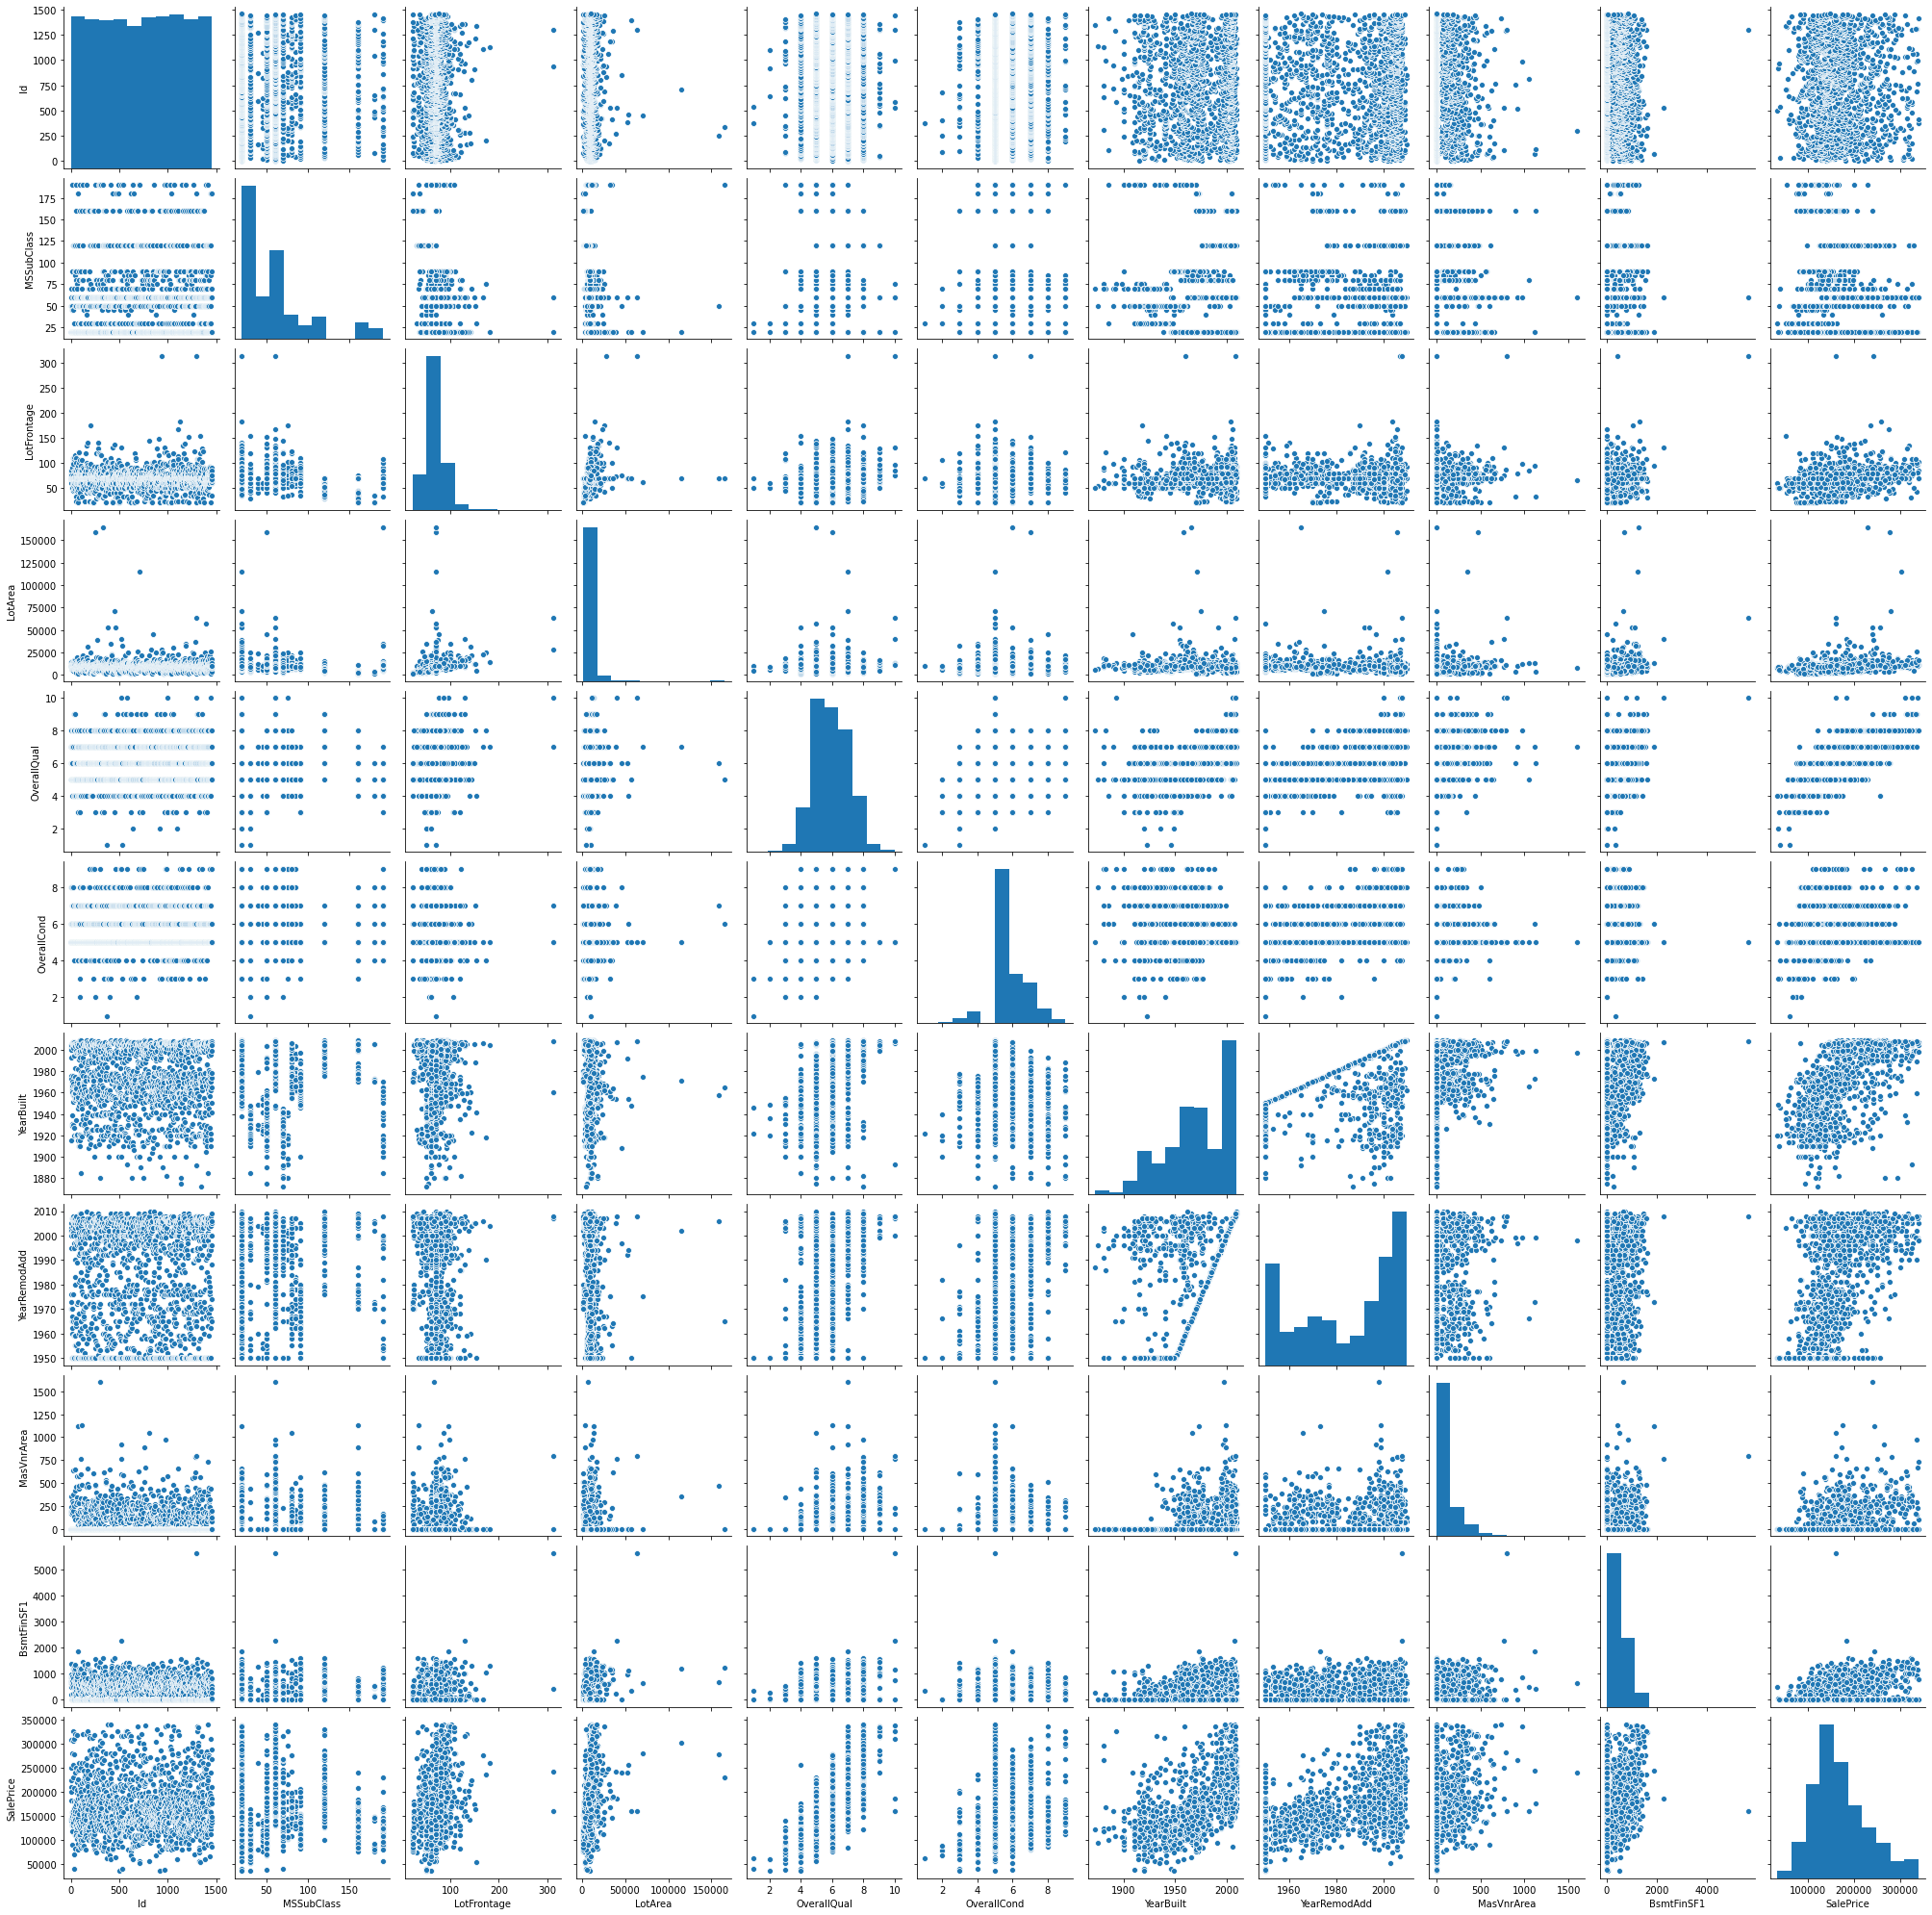

In [30]:
set_of_quantitative_columns1 = list(train.iloc[:, 0:10].columns)
set_of_quantitative_columns1.append('SalePrice')
sns.pairplot(train[set_of_quantitative_columns1])

Figure 2. Pairplot depicting the associations between the quantitative variables and the label, which is the sale price. All of these eleven variables are associated with sale price.

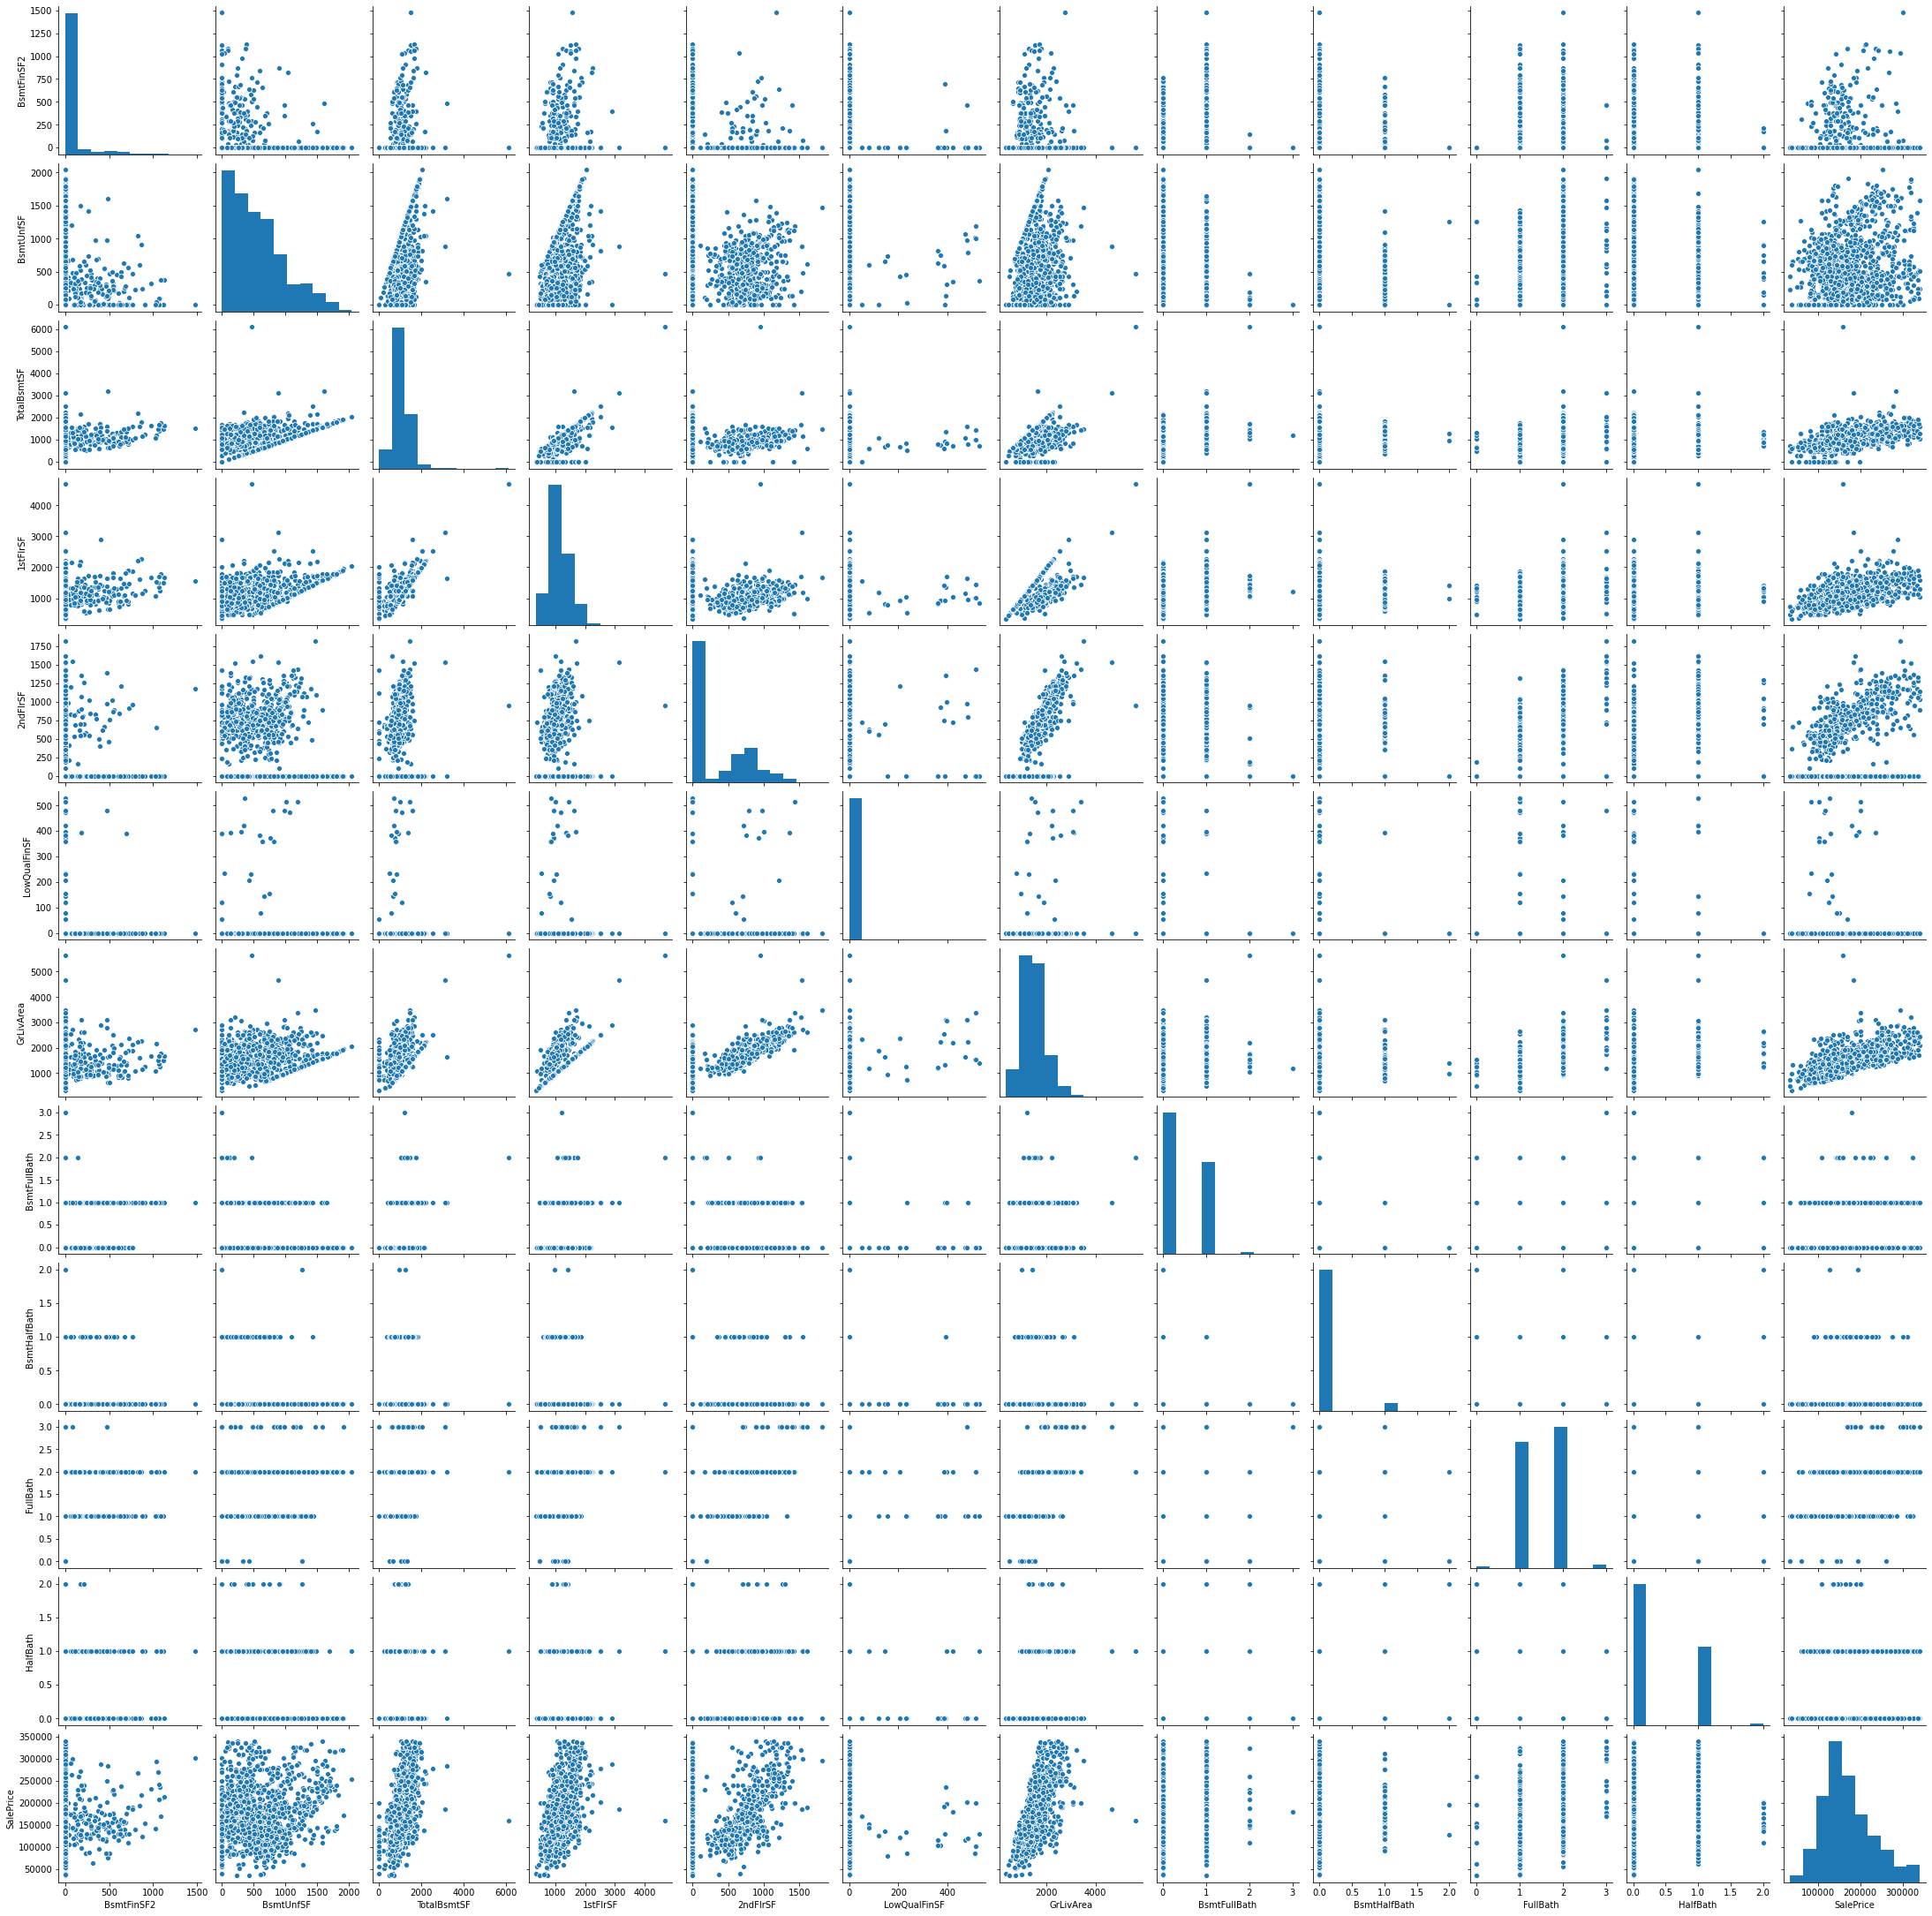

In [31]:
set_of_quantitative_columns2 = list(train.iloc[:, 10:21].columns)
set_of_quantitative_columns2.append('SalePrice')
sns.pairplot(train[set_of_quantitative_columns2])

Figure 3. Pairplot depicting the associations between the quantitative variables and the label, which is the sale price. All of these ten variables are associated with sale price.

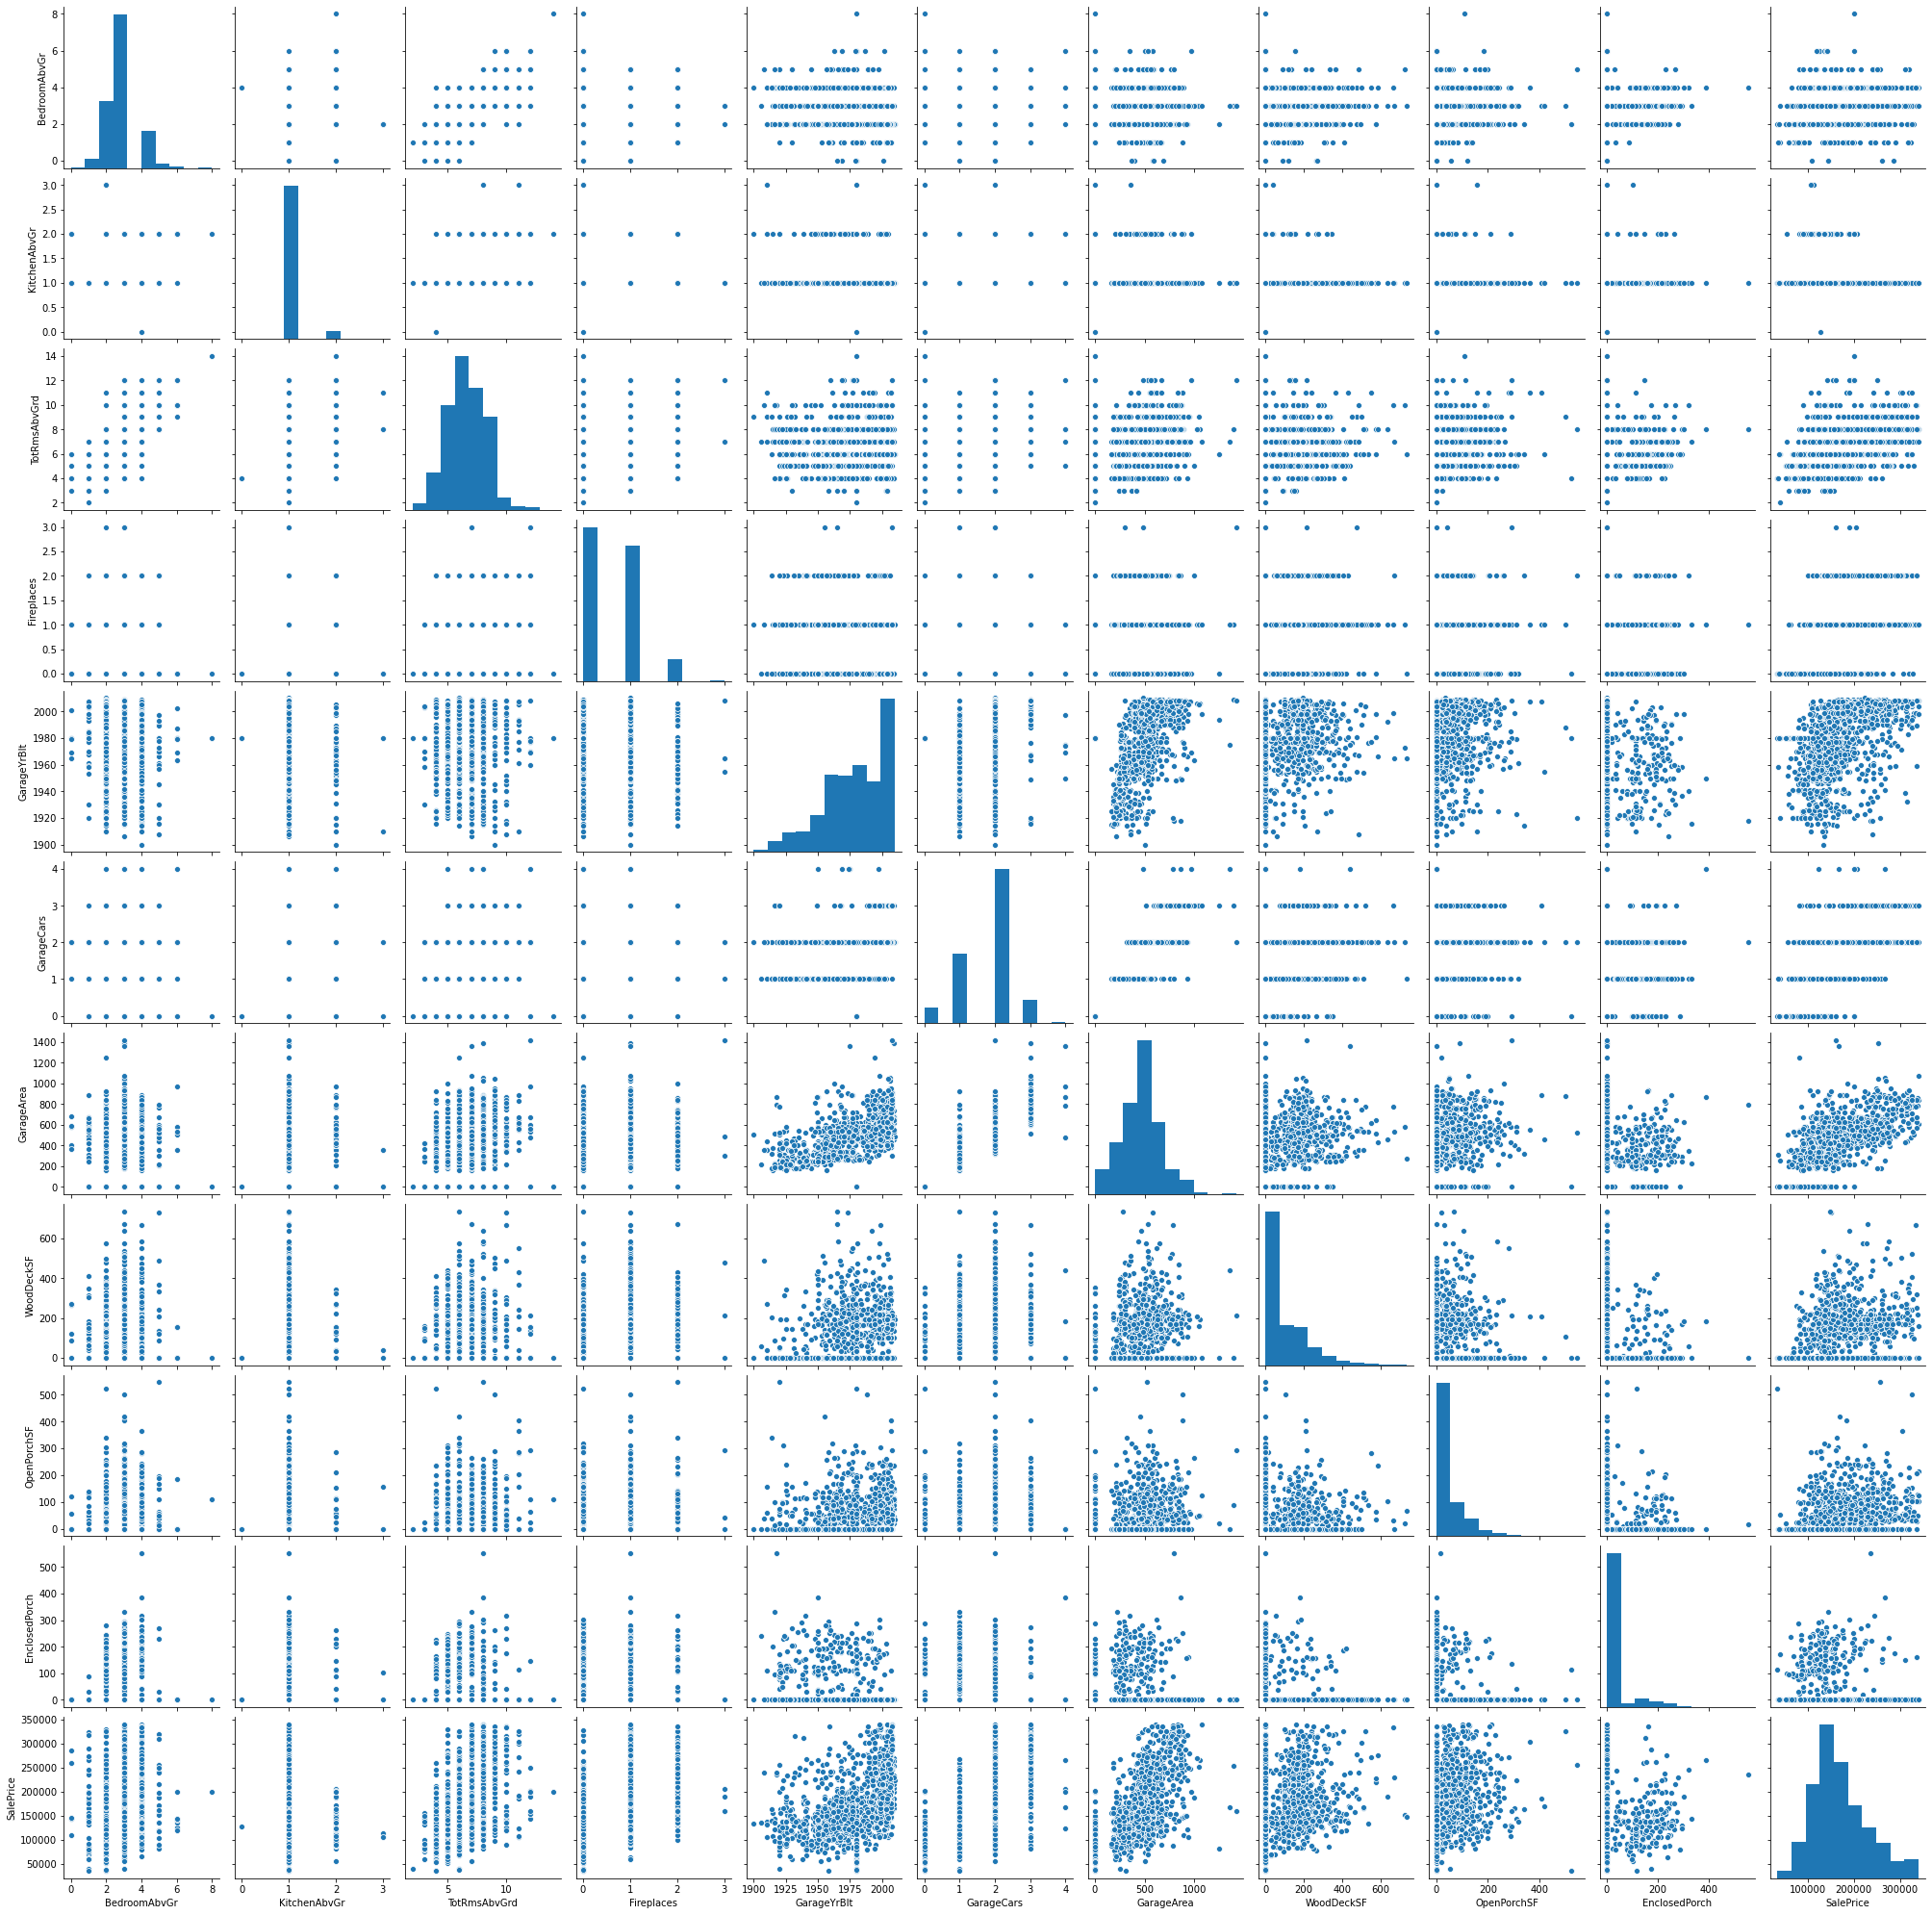

In [32]:
set_of_quantitative_columns3 = list(train.iloc[:, 21:31].columns)
set_of_quantitative_columns3.append('SalePrice')
sns.pairplot(train[set_of_quantitative_columns3])

# Model Development

Build a least squares linear regression model to predict sale price of homes.

RMSE log difference cross validation function.

In [33]:
def rmse(actual, predicted):
    return np.sqrt(np.mean((np.log(actual.astype('float')) - np.log(predicted.astype('float')))**2))

In [34]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    y = pd.Series(y)
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X[va_ind,:])))
    return np.mean(rmse_values)

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_new_train, y)
actual = y
predicted = reg.predict(X_new_train)
print("RMSE on the training set:", rmse(actual, predicted))
print("Cross Validation Accuracy RMSE: ", cross_validate_rmse(reg, X_new_train, y))

RMSE on the training set: 0.16845654620188957
Cross Validation Accuracy RMSE:  0.1750420706705208


Lasso regression model, with l1 regularization for effective l1 norm ball feature selection.

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 205)
lasso.fit(X_new_train, y)
actual = y
predicted = lasso.predict(X_new_train)
print("RMSE on the training set:", rmse(actual, predicted))
print("Cross Validation Accuracy RMSE: ", cross_validate_rmse(lasso, X_new_train, y))

RMSE on the training set: 0.1678012022463356
Cross Validation Accuracy RMSE:  0.17422498312346027


In [37]:
alpha_value_cval_errors1 = {}
alphas = np.linspace(1, 210, num= 200)
min_rmse = 0
for a in alphas:
    lasso = Lasso(alpha = a)
    lasso.fit(X_new_train, y)
    cval = cross_validate_rmse(lasso, X_new_train, y)
    alpha_value_cval_errors1[a] = cval
    if cval < min_rmse:
        min_rmse = cval
        min_alpha = a

min_rmse = min(list(alpha_value_cval_errors1.values()))
print(min_alpha, min_rmse)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587099601376.8679, tolerance: 490447533.84953535
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 490667536368.88165, tolerance: 390876674.32977694
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455457912809.348, tolerance: 380966232.4261255
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5019774912

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347879544261.66675, tolerance: 380966232.4261255
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317881594153.0669, tolerance: 399806512.0727287
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337048371044.99164, tolerance: 395310660.42813426
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288499316

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456403116102.9509, tolerance: 490447533.84953535
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 378614836129.56555, tolerance: 390876674.32977694
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373964157049.9499, tolerance: 380966232.4261255
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374197104

NameError: name 'min_alpha' is not defined

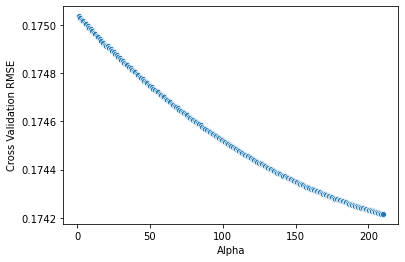

In [38]:
sns.scatterplot(x= list(alphas), y= list(alpha_value_cval_errors1.values()), data=pd.DataFrame(X_new_train))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Alpha')
plt.ylabel('Cross Validation RMSE')
plt.show()

Ridge regression model, with l2 regularization for effective L2 norm ball feature selection.

In [39]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha = 58)
ridge.fit(X_new_train, y)
actual = y
predicted = ridge.predict(X_new_train)
print("RMSE on the training set:", rmse(actual, predicted))
print("Cross Validation Accuracy RMSE: ", cross_validate_rmse(ridge, X_new_train, y))

RMSE on the training set: 0.16766544018991644
Cross Validation Accuracy RMSE:  0.17376463937086697


In [40]:
alpha_value_cval_errors2 = {}
alphas = np.linspace(1, 42, num= 200)
min_rmse = 10
for a in alphas:
    ridge = Ridge(alpha = a)
    ridge.fit(X_new_train, y)
    cval = cross_validate_rmse(ridge, X_new_train, y)
    alpha_value_cval_errors2[a] = cval
    if cval < min_rmse:
        min_rmse = cval
        min_alpha = a

min_rmse = min(list(alpha_value_cval_errors2.values()))
print(a, min_rmse)


42.0 0.17368623230903885


As the value of alpha increases, the cross validation rmse increases. This ensures that with a large number of features, the linear regression model with l2 regularization is able to generalize well to unseen data.

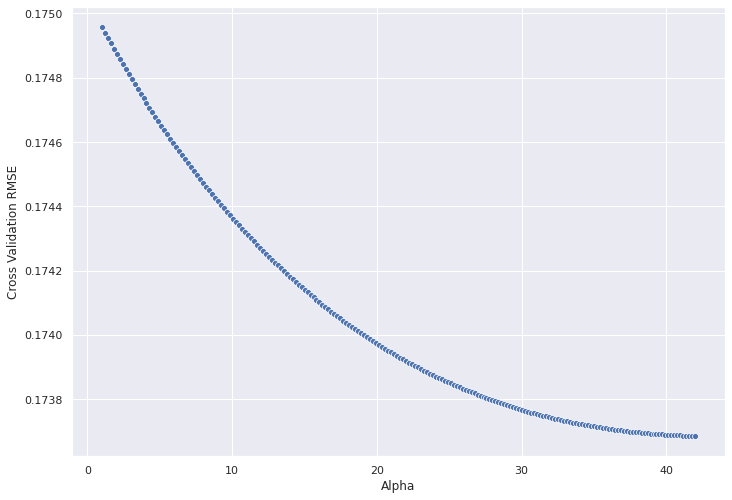

In [41]:
sns.scatterplot(x= list(alphas), y= list(alpha_value_cval_errors2.values()), data=pd.DataFrame(X_new_train))
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel('Alpha')
plt.ylabel('Cross Validation RMSE')
plt.show()

Thus, alpha value of 30 is the ideal value used to underfit the ridge regression model.

SGD regressor, with no penalty.

In [42]:
from sklearn.linear_model import SGDRegressor
sgd_regressor = SGDRegressor(max_iter=100000000, tol=1e-3, penalty = 'l2')
actual = y
sgd_regressor.fit(X_new_train, actual)
predicted = sgd_regressor.predict(X_new_train)
print("RMSE on the training set:", rmse(actual, predicted))
print("Cross Validation Accuracy RMSE: ", cross_validate_rmse(sgd_regressor, X_new_train, y))

RMSE on the training set: 15.348201634808213
Cross Validation Accuracy RMSE:  14.797301769643699


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Random Forest of Regression Trees. Some of the benefits of using this type of model is that it is able to generalize well to unseen data (low bias, as well as low variance), due to bagging different combinations of features, and bootstrapped data to capture the variance in the data.

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_new_train, y)
actual = y
predicted = rf.predict(X_new_train)
print("RMSE on the training set:", rmse(actual, predicted))
print("Cross Validation Accuracy RMSE: ", cross_validate_rmse(rf, X_new_train, y))

RMSE on the training set: 0.061833258524345514
Cross Validation Accuracy RMSE:  0.1551250780423836


Error on the training set as well as on the cross validation set after using RandomGridSearch for effective hyperparameter tuning for the random forest of regression trees model.

In [44]:
rf2 = RandomForestRegressor(n_estimators = 400,
    min_samples_split =  10,
    min_samples_leaf = 1,
    max_features = 'sqrt',
    max_depth = 60,
    bootstrap = False)

rf2.fit(X_new_train, y)
actual = y
predicted = rf2.predict(X_new_train)
print("RMSE on the training set:", rmse(actual, predicted))
print("Cross Validation Accuracy RMSE: ", cross_validate_rmse(rf2, X_new_train, y))

RMSE on the training set: 0.05814516846075709
Cross Validation Accuracy RMSE:  0.15459329895653356


Random hyperparameter grid to find out the best set of features for the random forest model.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_new_train, y)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.2min finished


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
sgd_regressor = SGDRegressor(max_iter=100000000, tol=1e-3, penalty = 'l2')
actual = y
sgd_regressor.fit(X_new_train, actual)
ridge_regression_predictions = ridge.predict(X_new_test)
ridge_regression_predictions = ridge_regression_predictions[0:len(ridge_regression_predictions)-1]
sample_submission['SalePrice'] = ridge_regression_predictions

In [ ]:
ridge= Ridge(alpha = 0)
ridge.fit(X, y)
ridge_regression_predictions = ridge.predict(test)
ridge_regression_predictions = ridge_regression_predictions[0:len(ridge_regression_predictions)-1]
sample_submission['SalePrice'] = ridge_regression_predictions

In [ ]:
lasso = Lasso(alpha = 205)
lasso.fit(X_new_train, y)
lasso_regression_predictions = lasso.predict(X_new_test)
lasso_regression_predictions = lasso_regression_predictions[0:len(lasso_regression_predictions)-1]
sample_submission['SalePrice'] = lasso_regression_predictions

The random forest of regression trees model with optimized hyperparameters performs the best on the unseen data(the test set). This is because the random forest of regression trees combines weak regression trees that tend to overfit to the training set(low bias), but also minimizes the variance. Minimizing the variance is achieved through bagging, which is the process of bootstrapping the set of features and fitting these regression trees to data sampled with replacement from the original sample. Thus, the random forest model minimizes the bias, as well as the variance, bypassing the bias variance tradeoff through bagging.

In [ ]:
rf2.fit(X_new_train, y)
random_forest_regression_predictions = rf2.predict(X_new_test)
random_forest_regression_predictions = random_forest_regression_predictions[0:len(random_forest_regression_predictions)-1]
sample_submission['SalePrice'] = random_forest_regression_predictions

In [ ]:
sample_submission['SalePrice'].head(20)

In [ ]:
reg = LinearRegression()
reg.fit(X_new_train, y)
lin_regression_predictions = reg.predict(test[cols_lst])
lin_regression_predictions = lin_regression_predictions[0:len(lin_regression_predictions)-1]
sample_submission['SalePrice'] = lin_regression_predictions

In [ ]:
sample_submission.to_csv('/kaggle/working/sample_submission14.csv', index = False)